# Creation of libraries based on pattern, random and scanning conditions

In this tutorial, we will explore a set of functionalities to generate peptide libraries depending on the amino acid content. Some of the functions create library from zero based on patterns or by random exploration. Other can include seeds and add some rules to propose analogs. A set of examples are provided with the main scenarios

### 1. Installation

Before starting, the pepfunn package can be installed as follows:

In [ ]:
!pip install pepfunn

Another way is to download the gihub code and running locally in the same folder: `pip install -e .`

### 2. Library generation using patterns

One way to generate libraries is by providing a pattern where random amino acids can be located in the **X** positions, and the others will remain fixed. For that purpose we import first the Library class from pepfunn:

In [1]:
from pepfunn.library import Library

Then we create an object that will contain the generate population. The function has the option to print progresively the number of sequences added to the library, but for practical purposes the variable is turned off:

In [2]:
libtest=Library(population_size=100, mode='exploration', pattern='XCXXXCX', add_phys_chem=True, mw_neigh=4, verbose=False)

The main parameters used in the previous example are:

- **population_size:** Final number of molecules required in the library.
- **mode:** There are two modes available: 'exploration' and 'scanning'. For designing random sequences we should select the 'exploration' mode.
- **pattern:** String that will contain the scaffold we require for the library. In the example we are using a cyclic peptide scaffold where only the cysteines are conserved.
- **add_phys_chem:** Flag to add some filters to select sequences with lower solubility and synthesis liabilities.
- **mw_neigh:** Maximum number of neighbor sequences having molecular weights within a 0.2 threshold. This is done to facilitate mass spec deconvolution.
- **verbose:** Flag to print or not the number of sequence included in the population.

After generating the library, we can check the first 10 elements and verify that the two cysteines are conserved according to the pattern:

In [11]:
libtest.population[0:10]

['WCMKTCY',
 'TCKLPCW',
 'PCEAECW',
 'MCMPDCA',
 'WCHIDCS',
 'TCMMECI',
 'VCAKYCI',
 'FCHPVCF',
 'PCMKDCI',
 'ICKNYCP']

### 3. Generation of random libraries of different sizes

Another case scenario is when we require to design random peptides of different sizes. Here we conserve the same parameters from the previous case, but add two more to play with length range of the peptides.

- **min_pep_size:** Minimum size of the peptides to be considered in the library.
- **max_pep_size:** Maximum size of the peptides to be considered in the library.

The following is an example generating peptides from 10 to 20 amino acids:

In [2]:
libtest2=Library(population_size=100, mode='exploration', add_phys_chem=True, mw_neigh=4, min_pep_size=10, max_pep_size=20, verbose=False)

We can plot the distribution of the sizes among the 100 sequences:

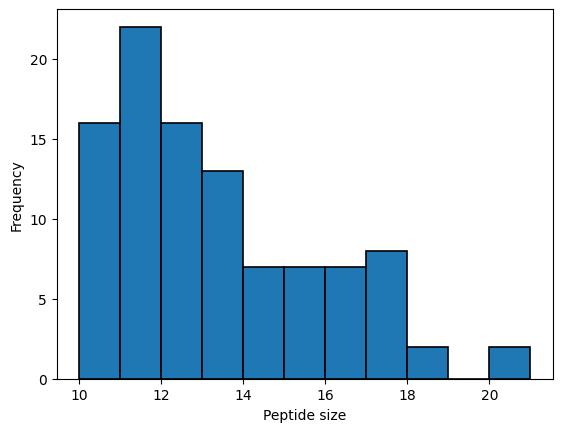

In [4]:
import matplotlib.pyplot as plt

# Get the length of each peptide in the library
lengths = [len(s) for s in libtest2.population]

# Create a histogram of the lengths
plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2, 1), edgecolor='black', linewidth=1.2)
plt.xlabel('Peptide size')
plt.ylabel('Frequency')

plt.show()

### 4. Generate a library using a seed (sequence template)

For scanning purposes, we can provide seeds (sequence templates) to modificy certain positions by specific residues or randomly. Some flags can be activated to include or not residue scanning in the library, as well as generate sequences from the generated ones. This is an example:

In [5]:
libtest3=Library(population_size=100, mode='scanning', mode_scan='all', seeds=['FNCREWCWN'], pairs=[(2,'A'),(3,'L'),(5,'R'),(7,'M')], add_scan=False, positions=[1,4,6,8], from_child=True, verbose=False)

Explanations about the new parameters here:

- **mode_scan:** Mode to decide which kind of information use to explore the analogs. This can be random (using positions as input), pairs (using specific changes), or all (using both pairs and random)
- **add_scan:** Flag to add specific residue scans to the seeds. It can be any of the natural residues.
- **pairs:** List with a set of tuples containing at first position the residue that will be modified, and in the other positions the amino acids that are allowed to be used in the mutations.
- **positions:** List with the numbers of the positions that can ve replace by any other residue.
- **from_child:** Flag to use offspring sequences to generate new ones.

The method can be tailored with additional options, like allowing the replacement of amino acids by those with similar phys-chem properties using the `add_prop_analog` flag. This is the list of the first 10 analogs:

In [6]:
libtest3.population[0:10]

['FNCREWCVN',
 'FNCREWMVN',
 'FNCREWMWN',
 'FNCREWMPN',
 'FNCREHMVN',
 'FNLREWMWN',
 'FNLRRWMWN',
 'FNCREVMWN',
 'FACREWMPN',
 'FNCREVMPN']

### 5. Using seeds and multiple changes at the same time

Finally, we can allow the method to generate libraries with multiple seeds and doing randomly more than one single modification. Similar to the previous example, these are some options we can add to activate this modality:

In [7]:
libtest4=Library(population_size=100, mode='scanning', mode_scan='all', seeds=['FNCREWCWN', 'NPVVHFFKNIVTP'], pairs=[(2,'A'),(3,'L'),(5,'R'),(7,'M')], positions=[2,3,5,7], single_mod=False, nb_number=3, mw_neigh=4, verbose=False)

- **single_mod:** This flag should be turned to False in order to add more than one mutation at the time.
- **nb_number:** Maximum number of substitutions per sequence.

In this mode, it is possible to add modify a parameter called `no_priority` that receives a list with positions that can be modified in a lower frequency based on the `perc_limit` variable, which is 0.1 (10%) by default

In [9]:
libtest4.population[0:10]

['FNMRNWCWN',
 'NMVVHFRKNIVTP',
 'FNLRRWMWN',
 'FACRRWMWN',
 'NADVAFFKNIVTP',
 'NHVVHFFKNIVTP',
 'NGLVRFFKNIVTP',
 'FRCREWAWN',
 'NWVVHFFKNIVTP',
 'NAVVRFFKNIVTP']

For any questions, please contact: raoc@novonordisk.com